In [1]:
import numpy as np
import sys
sys.path.append('/home/hooshmand/Documents/Git/myenv/lib/python3.11/site-packages')
import h5py
import matplotlib.pyplot as plt
import scipy
from skimage import io, transform 

In [2]:
def load_train_dataset(fileLoc):
    with h5py.File(fileLoc, 'r') as file:
        trainset_x = np.array(file['train_set_x'][:])
        trainset_y = np.array(file['train_set_y'][:])
        
        trainset_y = trainset_y.reshape((1, trainset_y.shape[0]))
       
    return trainset_x, trainset_y

In [3]:
def load_test_dataset(fileLoc):
    with h5py.File(fileLoc, 'r') as file:
        testset_x = np.array(file['test_set_x'][:])
        testset_y = np.array(file['test_set_y'][:])
        list_classes = np.array(file['list_classes'][:])
        
        testset_y = testset_y.reshape((1, testset_y.shape[0]))
        
    return testset_x, testset_y, list_classes

In [4]:
trainset_x, trainset_y = load_train_dataset('Data/train_catvnoncat.h5')
testset_x, testset_y, classes = load_test_dataset('Data/test_catvnoncat.hdf')

### Show Images

In [5]:
trainset_x[0].shape

(64, 64, 3)

It is not a cat.


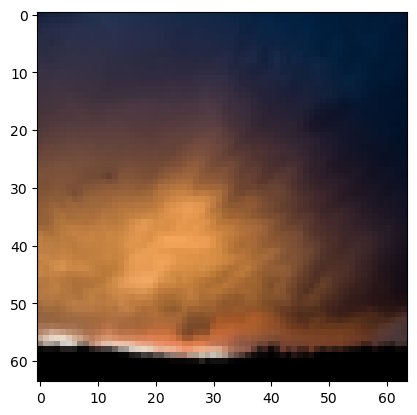

In [6]:
plt.imshow(trainset_x[0])
print("It is a cat" if trainset_y[0][0] == 1 else "It is not a cat.")

It is a cat picture.


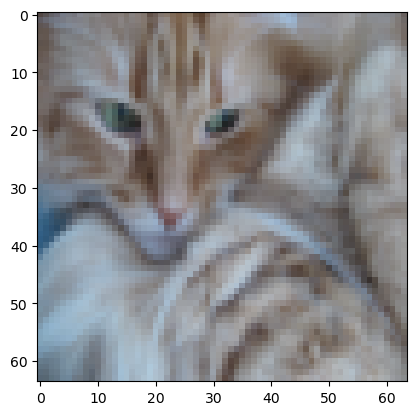

In [7]:
plt.imshow(trainset_x[2])
print("It is a cat picture." if trainset_y[0][2] == 1 else "It is not a cat picture.")

### Reshap some values

In [8]:
print ("Number of training examples: " + str(trainset_x.shape[0]))
print ("Number of testing examples: " + str(testset_x.shape[0]))
print ("Height/Width of each image: " + str(trainset_x.shape[1]))
print ("Each image is of size: (" + str(trainset_x.shape[1]) + ", " + str(trainset_x.shape[1]) + ", 3)")
print ("train_set_x shape: " + str(trainset_x.shape))
print ("train_set_y shape: " + str(trainset_y.shape))
print ("test_set_x shape: " + str(testset_x.shape))
print ("test_set_y shape: " + str(testset_y.shape))

Number of training examples: 209
Number of testing examples: 50
Height/Width of each image: 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [9]:
# when you pass -1 as the value, numpy will calculate this number for you. Then, you can use transpose (T) of it. 

train_set_x = trainset_x.reshape(trainset_x.shape[0] , -1).T
test_set_x = testset_x.reshape(testset_x.shape[0], -1).T

print(train_set_x.shape)
print(test_set_x.shape)

(12288, 209)
(12288, 50)


### Standardize datasets
#### ( divide each number by 255 which reperesents max value of a pixel channel )

In [10]:
train_set_x = train_set_x / 255
test_set_x = test_set_x / 255

In [11]:
print(train_set_x[0])

[0.06666667 0.76862745 0.32156863 0.00392157 0.03529412 0.32941176
 0.21960784 0.0745098  0.24705882 0.09019608 0.7372549  0.01568627
 0.60392157 0.06666667 0.28235294 0.96078431 0.99215686 0.85098039
 0.54901961 0.00784314 0.01960784 0.06666667 0.64313725 0.61176471
 0.47843137 0.05882353 0.30588235 0.14117647 0.05490196 0.70588235
 0.15294118 0.74509804 0.91372549 0.50588235 0.5372549  0.10196078
 0.09019608 0.36862745 0.24705882 0.44313725 0.46666667 0.00392157
 0.24705882 1.         0.23921569 0.         0.25098039 0.2
 0.08235294 0.22352941 0.64313725 0.59607843 0.41568627 0.15686275
 0.05882353 1.         0.12156863 0.55294118 0.20392157 0.29411765
 0.31764706 0.49019608 0.38823529 0.36862745 0.00784314 0.3372549
 0.88627451 0.29803922 0.54509804 0.16862745 0.09411765 0.02745098
 0.05098039 0.40392157 0.33333333 0.43137255 0.09803922 0.23921569
 0.13333333 0.10588235 0.69019608 0.73333333 0.10196078 0.98823529
 0.37647059 0.09803922 0.13333333 0.23529412 0.48235294 0.17647059
 0.

In [12]:
def Sigmoid(z):
    
    sigmoid = 1 / (1 + np.exp(-z))
    
    return sigmoid

In [13]:
print ("sigmoid([0, 2]) = " + str(Sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [14]:
def Initialize_zero_vectors(dim):
    W = np.zeros([dim,1])
    b = 0 
    
    return W,b

In [15]:
W,b = Initialize_zero_vectors(2)
print ("W = " + str(W))
print ("b = " + str(b))

W = [[0.]
 [0.]]
b = 0


In [16]:
def propagate(W, b, X, Y):
    
    m = X.shape[1]
    
    z = np.matmul(W.T, X) + b
    sigmoid = Sigmoid(z)
    
    
    J = np.sum(Y * np.log(sigmoid) + (1-Y) * np.log(1-sigmoid)) * (1 / -m)
    dw = np.matmul(X, (sigmoid - Y).T) / m 
    db = np.sum(sigmoid - Y) / m

   
    return J, db, dw

In [17]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
cost, db, dw = propagate(w, b, X, Y)
print ("dw = " + str(dw))
print ("db = " + str(db))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [18]:
def optimize(W, b, X, Y, num_iterations, learning_rate):
    costs = []
    
    for i in range(0, num_iterations):
        cost, db, dw = propagate(W, b, X, Y)
        b = b - learning_rate * db
        W = W - learning_rate * dw
        
        costs.append(cost)
        
    return W, b, db, dw, costs

In [19]:
W, b, db, dw, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009)

print ("w = " + str(W))
print ("b = " + str(b))
print ("dw = " + str(dw))
print ("db = " + str(db))
print("cost (max and min) = " + str(costs[0]) + "-" + str(costs[99]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657
cost (max and min) = 5.801545319394553-1.0784313398164707


In [20]:
def predict(w, b, X):
    epsilon = 0.5
    m = X.shape[1]
    pred_y = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = Sigmoid(np.matmul(w.T, X) + b)
    pred_y = (A > epsilon)
    
    return pred_y[0].astype(int)

In [21]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [1 1 0]


In [22]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):
    
    w, b = Initialize_zero_vectors(X_train.shape[0])
    W, b, db, dw, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    Y_prediction_test = predict(W, b, X_test)
    Y_prediction_train = predict(W, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : W, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d



In [23]:
d = model(train_set_x, trainset_y, test_set_x, testset_y, num_iterations = 2000, learning_rate = 0.005)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


### Plot learning curve with costs

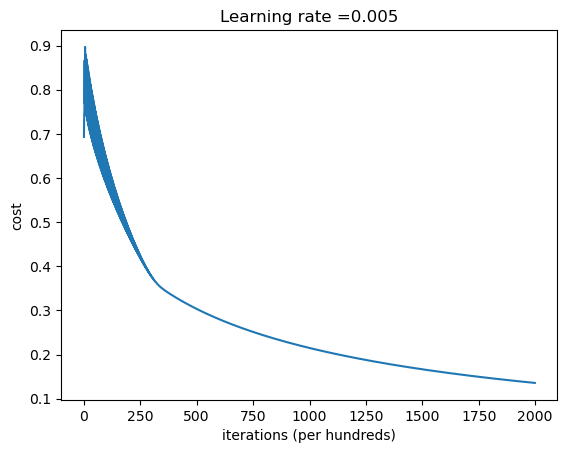

In [24]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

### Test an image

y = 0, your algorithm predicts a "non-cat" picture.


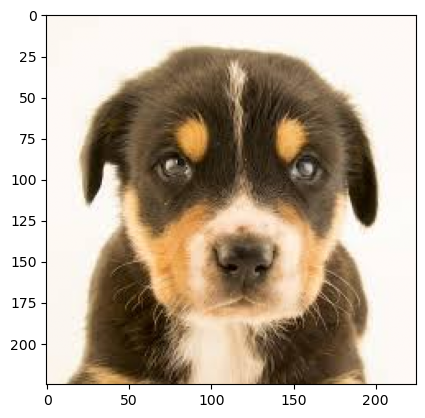

In [33]:
my_image = "Data/dog2.jpeg"   


num_px = trainset_x.shape[1]
image = np.array(io.imread(my_image))
image = image/255.

my_image = transform.resize(image, (num_px,num_px)).reshape((1, num_px*num_px*3)).T


my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")


y = 1, your algorithm predicts a "cat" picture.


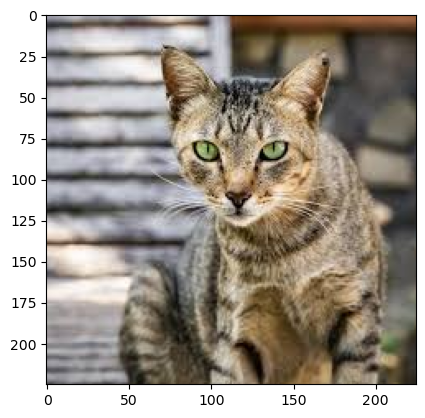

In [34]:
my_image = "Data/cat3.jpeg"   


image = np.array(io.imread(my_image))
image = image/255.

my_image = transform.resize(image, (num_px,num_px)).reshape((1, num_px*num_px*3)).T


my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
